<a href="https://colab.research.google.com/github/Pongpang-2102/Text_Mining_and_Sentiment_Analytics_KDAI_projects/blob/main/KDAI_TMSA_Midterm_Project_(10_Sep_23)_%E0%B8%82%E0%B9%89%E0%B8%AD_2_1_W2V_Deepcut_(%E0%B9%84%E0%B8%A1%E0%B9%88%E0%B9%84%E0%B8%94%E0%B9%89%E0%B9%83%E0%B8%8A%E0%B9%89%E0%B8%AD%E0%B8%B1%E0%B8%99%E0%B8%99%E0%B8%B5%E0%B9%89%E0%B8%AA%E0%B9%88%E0%B8%87).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Midterm Project วิชา Text Mining and Sentiment Analytics (1/2566)

## Student info

- Name : Puriwat Sangrawee ( นายภูริวัฒน์ แสงระวี)
- Student ID : 65056071
- สาขาวิชา : วิทยาการข้อมูลและการวิเคราะห์ (ชั้นปีที่ 2 )

# โจทย์ปัญหา

## ข้อ 2 : Text Analytics (25 คะแนน)

- ให้นักศึกษานำความคิดเห็นที่ได้รับใน Folder ของแต่ละคนไปดำเนินการดังนี้

### 2.1 Word Embedding (Word2vec)

**คำชี้แจง**

- ทำ Word Embedding (word2vec) ด้วยวิธีใดก็ได้ จากนั้นนำไป plot ใน https://projector.tensorflow.org/ และอธิบายสิ่งที่พบ

**ลำดับการทำงาน**

- ติดตั้ง PyThaiNLP & Mount Google Drive

In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 98.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- ติดตั้งตัวตัดคำ

- ติดตั้ง `Deepcut`

In [ ]:
!pip install deepcut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.1 MB/s eta 0:00:00


- Import package ที่จำเป็น

In [ ]:
import numpy as np
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
from IPython.display import clear_output

import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

import pickle as p

- อ่านไฟล์ที่จะใช้ทดสอบตัวตัดคำ

In [ ]:
# read text file : femcomment.txt

with open("/content/drive/MyDrive/# KDAI_TextMining/Exam 4-10 Sep 23/Problem02/femcomment.txt", "r") as file:
    corpus = file.read().splitlines()

print(corpus)

['เฟมทวิตคือคนที่ลากทุกอย่างไปเป็นเรื่อง ความไม่เท่าเทียมกันของชญ.ได้หมด เพื่อด่าผช. มีลักษณะคล้าย feminism ยุคบุกเบิก', 'จะเฟมินิสต์หรือเฟมทวิต ก็ไม่เคยเป็นคำที่ได้รับการเวลคัมในสังคมชายเป็นใหญ่อยู่แล้วค่ะ ดูสถานการณ์ในเกาหลีตอนนี้ได้เลย ', 'และถ้าเทียบการพยายามดิสเครดิต ก็เทียบได้กับคำว่าสามกีบที่ฝ่ายต่อต้านปชต. พยายามใช้ เฟมทวิตก็ถูกแปะป้ายคล้ายๆกัน แต่เราก็รีเคลมคำมาใช้กันนานแล้ว', 'เฟมทวิตดูโง่เพราะคนอย่างนี้แหละค่ะ', 'เฟมทวิตไม่น่าจะอยากคุยกับคนแบบมึงนะ', 'เฉลยแล้ว ว่าเฟมทวิตไม่ได้อยากเป็นเฟม เขาอยากได้ผัวเป็นเฟมนู่น ปังกว่าอี๊ก เธอเอ้ยๆ', 'อะไรๆก็เฟมทวิต ดิชั้นงง เฟมทวิตหรือทักกี้ โดนทุกอย่าง อะไรๆก็เฟมทวิตไว้ก่อน', 'เปนเหี้ยอะไรกับเฟมทวิตนักหนา', 'เฟมทพวิตทำให้ผมเกลียดเฟมมิวนิต', 'ไอเหี้ยยย น้องกูเป็นเฟมทวิต ม่ายย', 'กูไปเจอคนในเฟสบอกว่า เฟมทวิตก็ไม่ต่างอะไรกับขยะสังคม ', 'มึงนี่ก้จะงับหางเฟมทวิตให้ได้เนอะ', 'พวกเฟมทวิตที่เอะอะอ้างชายเป็นใหญ่นั่นนี่มึงโตมาแบบไหนอะแม่มึงต้องคลานเขาพนมมือกราบพ่อมึงทุกวันเลยเหรอเลยจำฝังใจเห็นผู้ชายก็หลอนไปหมด โยงเก่งอิดอก ', 'ชายเป็นใหญ่ไรก่อนบ้าน

- นับจำนวนประโยคที่มีมาให้

In [ ]:
# to count number of sentences in file : femcomment.txt
len(corpus)

500

#### 01 - ตัวตัดคำ

- ทดลองตัดคำด้วย `word_tokenize` (default จะเป็น engine แบบ `newmm`)

In [ ]:
from pythainlp.tokenize import word_tokenize

In [ ]:
from pythainlp.tokenize import word_tokenize
words_word_tokenize = []
for sentences in corpus:
    tokens_word_tokenize = word_tokenize(sentences.strip())
    for word_word_tokenize in tokens_word_tokenize:
        words_word_tokenize .append(word_word_tokenize)

print(words_word_tokenize)

['เฟม', 'ทวิ', 'ต', 'คือ', 'คน', 'ที่', 'ลาก', 'ทุกอย่าง', 'ไป', 'เป็นเรื่อง', ' ', 'ความ', 'ไม่', 'เท่าเทียมกัน', 'ของ', 'ชญ.', 'ได้', 'หมด', ' ', 'เพื่อ', 'ด่า', 'ผช.', ' ', 'มี', 'ลักษณะ', 'คล้าย', ' ', 'feminism', ' ', 'ยุค', 'บุกเบิก', 'จะ', 'เฟมินิสต์', 'หรือ', 'เฟม', 'ทวิ', 'ต', ' ', 'ก็', 'ไม่', 'เคย', 'เป็น', 'คำ', 'ที่', 'ได้รับ', 'การ', 'เวลคัม', 'ใน', 'สังคม', 'ชาย', 'เป็นใหญ่', 'อยู่แล้ว', 'ค่ะ', ' ', 'ดู', 'สถานการณ์', 'ใน', 'เกาหลี', 'ตอนนี้', 'ได้', 'เลย', 'และ', 'ถ้า', 'เทียบ', 'การ', 'พยายาม', 'ดิสเครดิต', ' ', 'ก็', 'เทียบ', 'ได้', 'กับ', 'คำ', 'ว่า', 'สาม', 'กีบ', 'ที่', 'ฝ่าย', 'ต่อต้าน', 'ปชต.', ' ', 'พยายาม', 'ใช้', ' ', 'เฟม', 'ทวิ', 'ต', 'ก็', 'ถูก', 'แปะ', 'ป้าย', 'คล้ายๆ', 'กัน', ' ', 'แต่', 'เรา', 'ก็', 'รี', 'เคลม', 'คำ', 'มา', 'ใช้', 'กัน', 'นาน', 'แล้ว', 'เฟม', 'ทวิ', 'ต', 'ดู', 'โง่', 'เพราะ', 'คน', 'อย่าง', 'นี้แหละ', 'ค่ะ', 'เฟม', 'ทวิ', 'ต', 'ไม่', 'น่าจะ', 'อยาก', 'คุย', 'กับ', 'คน', 'แบบ', 'มึง', 'นะ', 'เฉลย', 'แล้ว', ' ', 'ว่า', 'เฟม', 'ทวิ', 'ต', 

- นับจำนวนคำที่เกิดจาก **Word Embedding** แบบ `word_tokenize` (newmm)

In [ ]:
# to count the number of word from this method : word tokenize
len(words_word_tokenize)

8850

- ทดลองตัดคำด้วย engine แบบ `deepcut`

In [ ]:
import deepcut

In [ ]:
words_word_deepcut = []
for sentences in corpus:
    tokens_deepcut = deepcut.tokenize(sentences.strip())
    for word_deepcut in tokens_deepcut:
        words_word_deepcut.append(word_deepcut)

print(words_word_deepcut)


2/2 [==============================] - 0s 4ms/step
['เฟมทวิต', 'คือ', 'คน', 'ที่', 'ลาก', 'ทุก', 'อย่าง', 'ไป', 'เป็น', 'เรื่อง', ' ', 'ความ', 'ไม่', 'เท่าเทียม', 'กัน', 'ของ', 'ชญ.', 'ได้', 'หมด', ' ', 'เพื่อ', 'ด่า', 'ผช.', ' ', 'มี', 'ลักษณะ', 'คล้าย', ' ', 'feminism', ' ', 'ยุค', 'บุกเบิก', 'จะ', 'เฟมินิสต์', 'หรือ', 'เฟมทวิต', ' ', 'ก็', 'ไม่', 'เคย', 'เป็น', 'คำ', 'ที่', 'ได้', 'รับ', 'การ', 'เวลคัม', 'ใน', 'สังคม', 'ชาย', 'เป็น', 'ใหญ่', 'อยู่แล้ว', 'ค่ะ', ' ', 'ดู', 'สถานการณ์', 'ใน', 'เกาหลี', 'ตอน', 'นี้', 'ได้', 'เลย', 'และ', 'ถ้า', 'เทียบ', 'การ', 'พยายาม', 'ดิส', 'เครดิต', ' ', 'ก็', 'เทียบ', 'ได้', 'กับ', 'คำ', 'ว่า', 'สาม', 'กีบ', 'ที่', 'ฝ่าย', 'ต่อต้านปชต.', ' ', 'พยายาม', 'ใช้', ' ', 'เฟมทวิต', 'ก็', 'ถูก', 'แปะ', 'ป้าย', 'คล้าย', 'ๆ', 'กัน', ' ', 'แต่', 'เรา', 'ก็', 'รีเคลม', 'คำ', 'มา', 'ใช้', 'กัน', 'นาน', 'แล้ว', 'เฟมทวิตดู', 'โง่', 'เพราะ', 'คน', 'อย่าง', 'นี้', 'แหละ', 'ค่ะ', 'เฟมทวิต', 'ไม่', 'น่า', 'จะ', 'อยาก', 'คุย', 'กับ', 'คน', 'แบบ', 'มึง', 'นะ', 'เฉลย', 

- นับจำนวนคำที่เกิดจาก **Word Embedding** แบบ `deepcut`

In [ ]:
# to count the number of word from this method : deepcut
len(words_word_deepcut)

9831

- ลองเลือกมาซักวิธี ในที่นี้จะเลือกรูปแบบ `deepcut`

In [ ]:
words = set(words_word_deepcut)
words

{'อีสันขวาน',
 'เฟมทวิตออริจินอลแบบ',
 'กูงง',
 'บ้า',
 'ยุติธรรม',
 'รุนแรงเอดุเขต',
 'บ่าย',
 'คีย์',
 'ลำดับ',
 'เงียบ',
 'ดิชั้น',
 'คลับ',
 'กายภาพ',
 'อิเวร',
 'เคย',
 'ค้าบ',
 '#อนาคต',
 'สไตล์',
 'มจ',
 'ครอบครัว',
 'ทางเพศ',
 'ไหม',
 'รัฐสภา',
 'อิสัส',
 'กดทับ',
 'ควาย',
 'แสล๋น',
 'มุก',
 'ทำไม',
 'คุณภาพ',
 'ด่ากราด',
 'ฉะนั้น',
 'ปิด',
 'เข่น',
 'ย้ำ',
 'กี้ดก๊าด',
 'feminists',
 'ได้',
 'สุดยอด',
 'ใต้',
 'ตน',
 'ทบทวบ',
 'ชอบ',
 'แดกร้อย',
 'ไหล',
 'ยยย',
 'เร่า',
 'เฟมินิส',
 'แปก',
 'ลี้',
 'คอย',
 'ยาก',
 'กำกับ',
 'กระจาย',
 'เสร่อเสือก',
 'ต้น',
 'เหลื่อมล้ำ',
 'ยก',
 ' ย',
 'เนอะ',
 'ทุก',
 'มึง',
 'รึ',
 'น่า',
 'จ้วก',
 'แทก',
 'ญี่ปุ่น',
 'ประโยชน์',
 'ยังคง',
 'อยู่',
 'ก่อนหน้า',
 'ซาบซึ้ง',
 'คุณอภิสิทธิ์',
 'พวก',
 'ทวิต ',
 'โทษ',
 'สอดแทรก',
 'เปลี่ยน',
 'เมนอาแทรชดูใจ',
 'สั่ง',
 'ผม',
 'สมควร',
 'รับ',
 'สม',
 'มึงดู',
 'บ่อย',
 'ต่างๆ',
 'ลง',
 'ซ้ำ',
 'จอย',
 'กราบ',
 'ไล่',
 'ร้อย',
 'จักร',
 'สบาย',
 'เเล้ว',
 'ซะ',
 'ปาม',
 'บังคับ',
 'ทัก',
 'เมื่อ

- แปลงคำในคลังคำศัพท์ที่สร้างด้วยวิธี Deepcut ข้างต้นให้เป็น Vector (มีตัวเลขกำกับ)

In [ ]:
vocab_size = len(words)

word2int = {}
int2word = {}

for i, word in enumerate(words):
    word2int[word] = i
    int2word[i] = word



In [ ]:
word2int

{'อีสันขวาน': 0,
 'เฟมทวิตออริจินอลแบบ': 1,
 'กูงง': 2,
 'บ้า': 3,
 'ยุติธรรม': 4,
 'รุนแรงเอดุเขต': 5,
 'บ่าย': 6,
 'คีย์': 7,
 'ลำดับ': 8,
 'เงียบ': 9,
 'ดิชั้น': 10,
 'คลับ': 11,
 'กายภาพ': 12,
 'อิเวร': 13,
 'เคย': 14,
 'ค้าบ': 15,
 '#อนาคต': 16,
 'สไตล์': 17,
 'มจ': 18,
 'ครอบครัว': 19,
 'ทางเพศ': 20,
 'ไหม': 21,
 'รัฐสภา': 22,
 'อิสัส': 23,
 'กดทับ': 24,
 'ควาย': 25,
 'แสล๋น': 26,
 'มุก': 27,
 'ทำไม': 28,
 'คุณภาพ': 29,
 'ด่ากราด': 30,
 'ฉะนั้น': 31,
 'ปิด': 32,
 'เข่น': 33,
 'ย้ำ': 34,
 'กี้ดก๊าด': 35,
 'feminists': 36,
 'ได้': 37,
 'สุดยอด': 38,
 'ใต้': 39,
 'ตน': 40,
 'ทบทวบ': 41,
 'ชอบ': 42,
 'แดกร้อย': 43,
 'ไหล': 44,
 'ยยย': 45,
 'เร่า': 46,
 'เฟมินิส': 47,
 'แปก': 48,
 'ลี้': 49,
 'คอย': 50,
 'ยาก': 51,
 'กำกับ': 52,
 'กระจาย': 53,
 'เสร่อเสือก': 54,
 'ต้น': 55,
 'เหลื่อมล้ำ': 56,
 'ยก': 57,
 ' ย': 58,
 'เนอะ': 59,
 'ทุก': 60,
 'มึง': 61,
 'รึ': 62,
 'น่า': 63,
 'จ้วก': 64,
 'แทก': 65,
 'ญี่ปุ่น': 66,
 'ประโยชน์': 67,
 'ยังคง': 68,
 'อยู่': 69,
 'ก่อนหน้า': 70,
 'ซาบซึ้ง':

In [ ]:
int2word

{0: 'อีสันขวาน',
 1: 'เฟมทวิตออริจินอลแบบ',
 2: 'กูงง',
 3: 'บ้า',
 4: 'ยุติธรรม',
 5: 'รุนแรงเอดุเขต',
 6: 'บ่าย',
 7: 'คีย์',
 8: 'ลำดับ',
 9: 'เงียบ',
 10: 'ดิชั้น',
 11: 'คลับ',
 12: 'กายภาพ',
 13: 'อิเวร',
 14: 'เคย',
 15: 'ค้าบ',
 16: '#อนาคต',
 17: 'สไตล์',
 18: 'มจ',
 19: 'ครอบครัว',
 20: 'ทางเพศ',
 21: 'ไหม',
 22: 'รัฐสภา',
 23: 'อิสัส',
 24: 'กดทับ',
 25: 'ควาย',
 26: 'แสล๋น',
 27: 'มุก',
 28: 'ทำไม',
 29: 'คุณภาพ',
 30: 'ด่ากราด',
 31: 'ฉะนั้น',
 32: 'ปิด',
 33: 'เข่น',
 34: 'ย้ำ',
 35: 'กี้ดก๊าด',
 36: 'feminists',
 37: 'ได้',
 38: 'สุดยอด',
 39: 'ใต้',
 40: 'ตน',
 41: 'ทบทวบ',
 42: 'ชอบ',
 43: 'แดกร้อย',
 44: 'ไหล',
 45: 'ยยย',
 46: 'เร่า',
 47: 'เฟมินิส',
 48: 'แปก',
 49: 'ลี้',
 50: 'คอย',
 51: 'ยาก',
 52: 'กำกับ',
 53: 'กระจาย',
 54: 'เสร่อเสือก',
 55: 'ต้น',
 56: 'เหลื่อมล้ำ',
 57: 'ยก',
 58: ' ย',
 59: 'เนอะ',
 60: 'ทุก',
 61: 'มึง',
 62: 'รึ',
 63: 'น่า',
 64: 'จ้วก',
 65: 'แทก',
 66: 'ญี่ปุ่น',
 67: 'ประโยชน์',
 68: 'ยังคง',
 69: 'อยู่',
 70: 'ก่อนหน้า',
 71: 'ซาบซึ

In [ ]:
sentences = []
for st in corpus:
    tokens = deepcut.tokenize(st.strip())
    sentences.append(tokens)

sentences

2/2 [==============================] - 0s 4ms/step


[['เฟมทวิต',
  'คือ',
  'คน',
  'ที่',
  'ลาก',
  'ทุก',
  'อย่าง',
  'ไป',
  'เป็น',
  'เรื่อง',
  ' ',
  'ความ',
  'ไม่',
  'เท่าเทียม',
  'กัน',
  'ของ',
  'ชญ.',
  'ได้',
  'หมด',
  ' ',
  'เพื่อ',
  'ด่า',
  'ผช.',
  ' ',
  'มี',
  'ลักษณะ',
  'คล้าย',
  ' ',
  'feminism',
  ' ',
  'ยุค',
  'บุกเบิก'],
 ['จะ',
  'เฟมินิสต์',
  'หรือ',
  'เฟมทวิต',
  ' ',
  'ก็',
  'ไม่',
  'เคย',
  'เป็น',
  'คำ',
  'ที่',
  'ได้',
  'รับ',
  'การ',
  'เวลคัม',
  'ใน',
  'สังคม',
  'ชาย',
  'เป็น',
  'ใหญ่',
  'อยู่แล้ว',
  'ค่ะ',
  ' ',
  'ดู',
  'สถานการณ์',
  'ใน',
  'เกาหลี',
  'ตอน',
  'นี้',
  'ได้',
  'เลย'],
 ['และ',
  'ถ้า',
  'เทียบ',
  'การ',
  'พยายาม',
  'ดิส',
  'เครดิต',
  ' ',
  'ก็',
  'เทียบ',
  'ได้',
  'กับ',
  'คำ',
  'ว่า',
  'สาม',
  'กีบ',
  'ที่',
  'ฝ่าย',
  'ต่อต้านปชต.',
  ' ',
  'พยายาม',
  'ใช้',
  ' ',
  'เฟมทวิต',
  'ก็',
  'ถูก',
  'แปะ',
  'ป้าย',
  'คล้าย',
  'ๆ',
  'กัน',
  ' ',
  'แต่',
  'เรา',
  'ก็',
  'รีเคลม',
  'คำ',
  'มา',
  'ใช้',
  'กัน',
  'นาน',
  '

In [ ]:
WINDOW_SIZE = 2

In [ ]:
data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence))+1] :
            if nb_word != word:
                data.append([word, nb_word])

data

[['เฟมทวิต', 'คือ'],
 ['เฟมทวิต', 'คน'],
 ['คือ', 'เฟมทวิต'],
 ['คือ', 'คน'],
 ['คือ', 'ที่'],
 ['คน', 'เฟมทวิต'],
 ['คน', 'คือ'],
 ['คน', 'ที่'],
 ['คน', 'ลาก'],
 ['ที่', 'คือ'],
 ['ที่', 'คน'],
 ['ที่', 'ลาก'],
 ['ที่', 'ทุก'],
 ['ลาก', 'คน'],
 ['ลาก', 'ที่'],
 ['ลาก', 'ทุก'],
 ['ลาก', 'อย่าง'],
 ['ทุก', 'ที่'],
 ['ทุก', 'ลาก'],
 ['ทุก', 'อย่าง'],
 ['ทุก', 'ไป'],
 ['อย่าง', 'ลาก'],
 ['อย่าง', 'ทุก'],
 ['อย่าง', 'ไป'],
 ['อย่าง', 'เป็น'],
 ['ไป', 'ทุก'],
 ['ไป', 'อย่าง'],
 ['ไป', 'เป็น'],
 ['ไป', 'เรื่อง'],
 ['เป็น', 'อย่าง'],
 ['เป็น', 'ไป'],
 ['เป็น', 'เรื่อง'],
 ['เป็น', ' '],
 ['เรื่อง', 'ไป'],
 ['เรื่อง', 'เป็น'],
 ['เรื่อง', ' '],
 ['เรื่อง', 'ความ'],
 [' ', 'เป็น'],
 [' ', 'เรื่อง'],
 [' ', 'ความ'],
 [' ', 'ไม่'],
 ['ความ', 'เรื่อง'],
 ['ความ', ' '],
 ['ความ', 'ไม่'],
 ['ความ', 'เท่าเทียม'],
 ['ไม่', ' '],
 ['ไม่', 'ความ'],
 ['ไม่', 'เท่าเทียม'],
 ['ไม่', 'กัน'],
 ['เท่าเทียม', 'ความ'],
 ['เท่าเทียม', 'ไม่'],
 ['เท่าเทียม', 'กัน'],
 ['เท่าเทียม', 'ของ'],
 ['กัน', 'ไม่'],
 ['กัน

#### 02 - Before Training

In [ ]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [ ]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [ ]:
x_train.shape, y_train.shape

((36044, 1446), (36044, 1446))

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- กำหนดจุด checkpoint ของ model

In [ ]:
# store checkpoint to w2v.h5

filename = 'w2v.h5'
checkpoint = ModelCheckpoint(filename, monitor='loss', verbose=1, save_best_only=True, mode='min')

- นิยาม Model แบบ Encoder-Decoder จำนวน 2 Layer

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(vocab_size,)))
model.add(Dropout(0.25))
model.add(Dense(vocab_size, activation = "softmax"))

- Compile Model

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                23152     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1446)              24582     
                                                                 
Total params: 47734 (186.46 KB)
Trainable params: 47734 (186.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- สร้าง Callback Function สำหรับ Plot ค่า Loss แบบ Realtime

In [ ]:
class PlotLosses(tensorflow.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();


In [ ]:
plot_losses = PlotLosses()

- Train Model

In [ ]:
EPOCH = 100
# cycle time : 71.2s/epoch

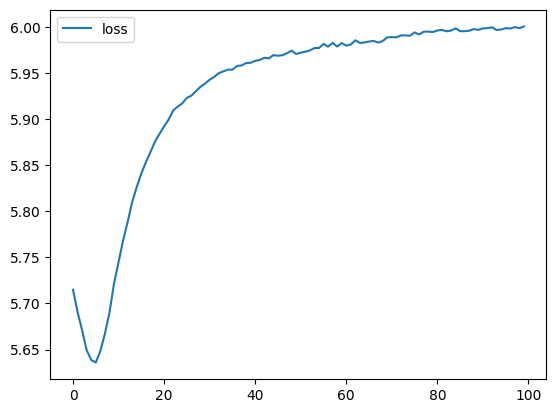

36044/36044 [==============================] - 71s 2ms/step - loss: 6.0006


In [ ]:
# start training model
# below graph will be plotted in real time process
history = model.fit(x_train,y_train, batch_size = 1, epochs=EPOCH, verbose=1, callbacks = [checkpoint, plot_losses])

#### 03 - After Training

- Load Model

In [ ]:
checkpoint_model = load_model(filename)

- ดึงค่า Weight และ Bias จาก Hidden Layer

In [ ]:
wb1 = checkpoint_model.layers[0].get_weights()
wb1[0].shape, wb1[1].shape

((1446, 16), (16,))

- คำนวน Vector จากการนำ Weight + Bias

In [ ]:
w1 = wb1[0]
b1 = wb1[1]

vectors = w1 + b1

vectors.shape

(1446, 16)

- Save History

In [ ]:
with open('w2v_history_model', 'wb') as file:
    p.dump(history.history, file)

- Load History

In [ ]:
with open('w2v_history_model', 'rb') as file:
     his = p.load(file)

- Plot ค่า Loss

In [ ]:
h1 = go.Scatter(y=his['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )

data = [h1]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename="w2v")

- นิยาม Functiom euclidean_dist และ find_closest เพื่อค้นหาคำที่อยู่ใกล้

In [ ]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

- ค้นหาคำที่อยู่ใกล้ :  *เฉลิมฉลอง* , *กดขี่* , *เท่าเทียม*

In [ ]:
print(int2word[find_closest(word2int['เฉลิมฉลอง'], vectors)])
print(int2word[find_closest(word2int['กดขี่'], vectors)])
print(int2word[find_closest(word2int['เท่าเทียม'], vectors)])

สู่สนามรบ
มอง
เสรีภาพ


- บันทึก Vector พร้อม Label ลงไฟล์ w2v.tsv และ label.tsv เพื่อนำไป Plot ที่ https://projector.tensorflow.org

In [ ]:
import csv

with open('w2v.tsv', 'w') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    for v in vectors:
        tsv_writer.writerow(v)

with open('label.tsv', 'w') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    for word in word2int:
        tsv_writer.writerow([word])

- หลังจากเรารันโค้ดด้านบน ไฟล์ `label.tsv` , `w2v.h5` , `w2v.tsv` และ `w2v_history_model` จะถูก generate ขึ้นมา ดังภาพ

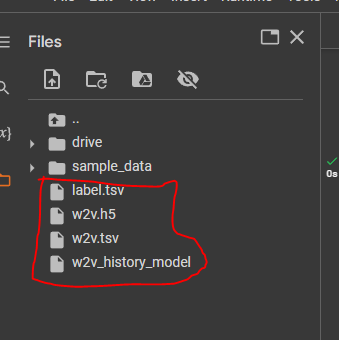

- ให้เราทำการ save ไฟล์ดังกล่าวมาไว้ที่เครื่อง  เพื่อจะนำไฟล์ดังกล่าวไปใช้งานในขั้นตอนถัดไป

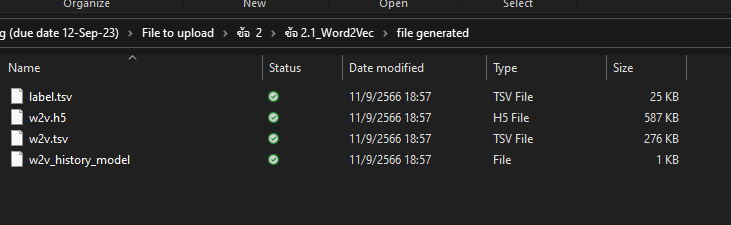

#### 04 - Projector Tensorflow

- ไปยัง https://projector.tensorflow.org กดที่ปุ่ม Load เพื่อ Load ไฟล์ w2v.tsv และ label.tsv

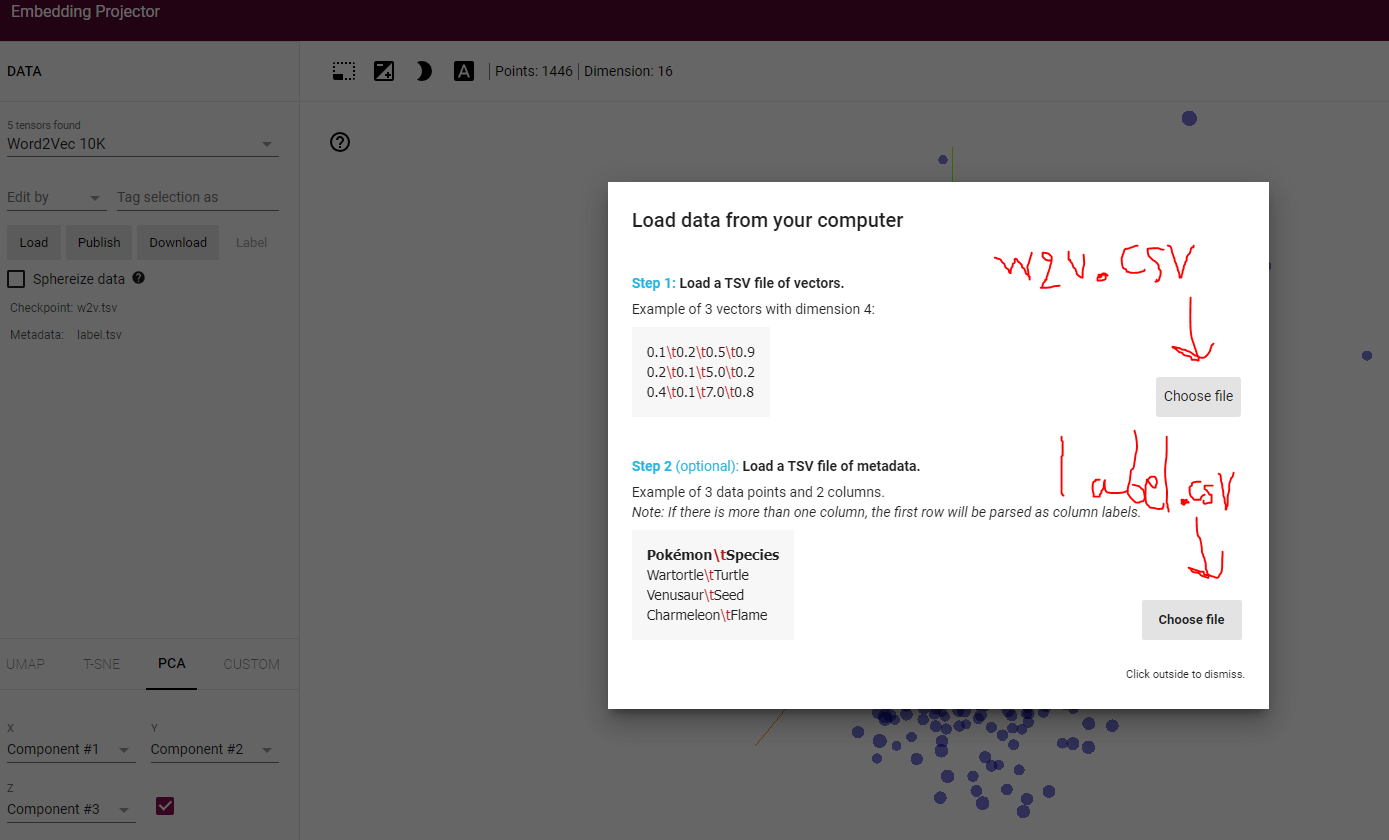